# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


Note: X is 2D array, while y is 1D array => we will reshape y into 2D array in order to have 1 unique input.

In [5]:
y = y.reshape(len(y), 1)   #changed row into column, reshape(new_rows, new_cols)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

Steps:

1.   Apply feature scaling on matrix of feature X (X_train and X_test).
2.   Apply feature scaling on dependent variable y (since the salary is much higher than the position level)

Note that if we do that our SVR model will not work properly.

When we will not apply feature scaling?
- On dummy variables (result from one hot encoding)
- Dependent variable that take binary value (b/c the value are already in the right range)

When we will apply feature scaling?
- When the dependent variable are super large compare to independent variables (such as this case)
- Whenever we slipt the training set and the test set, we will apply feature scaling after the split







In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()   #feature scaling
sc_y = StandardScaler()   #dependent variable scaling
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [7]:
print(X)   #examine X

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [8]:
print(y)   #examine y, range[-3, 3]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

More about Kernel Function: [SVM Kernel & Examples](https://data-flair.training/blogs/svm-kernel-functions/)

In this exercise, we will use Gaussian Tadial Basic Function (RBF) - The most widely used.



In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf')
regressor.fit(X, y)   # whole dataset

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In this section, we will understand how to reverse the scaling of our predictions. Since we already transform the new scale of y in the previous section, so the result we get is not the orginal y.

In [11]:
# regressor.predict(sc_X.transform([[6.5]])) -  expect 2D array input

array([-0.27861589])

Since we train our model on the scale value of the training set, we must enter the scaled value of the input that we want to predict.



In [12]:
# reverse scaling
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))  # add reshape to avoid formating error


array([[170370.0204065]])

## Visualising the SVR results

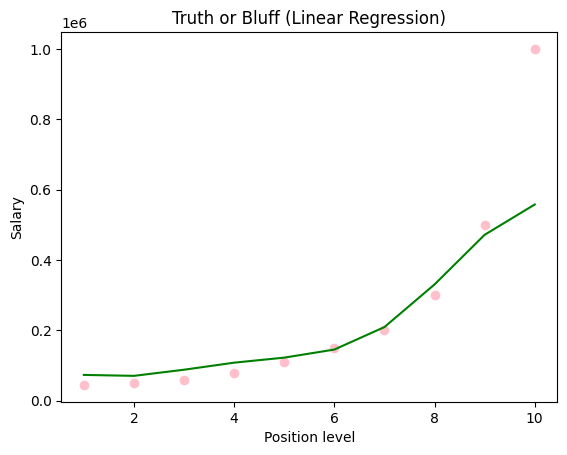

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'pink')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)) , color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Note about plt.plot():
- 1st parameter is the reversed transformation
- 2nd parameter is the preditions of the input in X, which we must not reapply the transform method on X (1st para is already scale)

Analyze the result: The predictions in green are very close to the real outcomes in pink. Expect the outlier (the last one).



## Visualising the SVR results (for higher resolution and smoother curve)

<ipython-input-17-4ed111c1f1a5>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)   #original scale


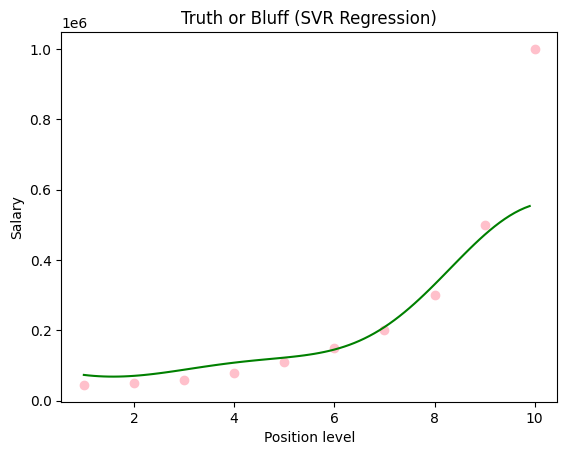

In [17]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)   #original scale
X_grid = X_grid.reshape((len(X_grid), 1))     # back to original shape
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'pink') #inverse for both x, y
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'green')
plt.title('Truth or Bluff (SVR Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Note for plt.plot(): don't forget to apply X_grid scale!
